In [73]:
from matplotlib import pyplot as plt
from PIL import Image
from scipy import signal
import os
import numpy as np
import math

np.set_printoptions(precision=3) # prettier printing for big matrices

In [31]:
def boxfilter(n):
    assert (n % 2 != 0), "Box filter size must be odd!"
    matrix = np.ones((n,n))
    return 1. / n**2 * matrix

In [32]:
print("Output: boxfilter(3)")
print(boxfilter(3))
print("Output: boxfilter(5)")
print(boxfilter(5))
print("Output: boxfilter(4)")
print(boxfilter(4))

Output: boxfilter(3)
[[ 0.111  0.111  0.111]
 [ 0.111  0.111  0.111]
 [ 0.111  0.111  0.111]]
Output: boxfilter(5)
[[ 0.04  0.04  0.04  0.04  0.04]
 [ 0.04  0.04  0.04  0.04  0.04]
 [ 0.04  0.04  0.04  0.04  0.04]
 [ 0.04  0.04  0.04  0.04  0.04]
 [ 0.04  0.04  0.04  0.04  0.04]]
Output: boxfilter(4)


AssertionError: Box filter size must be odd!

In [33]:
def gauss1d(sigma,inv=False):
    length = math.ceil(6*sigma)
    if (length % 2 == 0):
        length = length + 1
    x = np.arange(length) - math.floor(length/2)
    gauss1d = np.exp(-1*x**2/(2*sigma**2)) 
    if inv:
        return np.ones(length) - gauss1d/sum(gauss1d)
    return gauss1d/sum(gauss1d)

In [34]:
print("Output: gauss1d(0.3)")
print(gauss1d(0.3))
print("Output: gauss1d(0.5)")
print(gauss1d(0.5))
print("Output: gauss1d(1)")
print(gauss1d(1))
print("Output: gauss1d(2)")
print(gauss1d(2))

print(sum(gauss1d(2)))
      

Output: gauss1d(0.3)
[ 0.004  0.992  0.004]
Output: gauss1d(0.5)
[ 0.107  0.787  0.107]
Output: gauss1d(1)
[ 0.004  0.054  0.242  0.399  0.242  0.054  0.004]
Output: gauss1d(2)
[ 0.002  0.009  0.027  0.065  0.121  0.176  0.2    0.176  0.121  0.065
  0.027  0.009  0.002]
1.0


In [35]:
def gauss2d(sigma, inv=False):
    one_d = gauss1d(sigma,inv)
    one_d = one_d[np.newaxis]
    two_d = signal.convolve2d(one_d,np.transpose(one_d))
    return two_d

In [36]:
print("Output: gauss2d(0.5)")
print(gauss2d(0.5))
print("Output: gauss2d(1)")
print(gauss2d(1))

print(sum(sum(gauss2d(1))))

Output: gauss2d(0.5)
[[ 0.011  0.084  0.011]
 [ 0.084  0.619  0.084]
 [ 0.011  0.084  0.011]]
Output: gauss2d(1)
[[  1.965e-05   2.394e-04   1.073e-03   1.769e-03   1.073e-03   2.394e-04
    1.965e-05]
 [  2.394e-04   2.917e-03   1.307e-02   2.155e-02   1.307e-02   2.917e-03
    2.394e-04]
 [  1.073e-03   1.307e-02   5.858e-02   9.658e-02   5.858e-02   1.307e-02
    1.073e-03]
 [  1.769e-03   2.155e-02   9.658e-02   1.592e-01   9.658e-02   2.155e-02
    1.769e-03]
 [  1.073e-03   1.307e-02   5.858e-02   9.658e-02   5.858e-02   1.307e-02
    1.073e-03]
 [  2.394e-04   2.917e-03   1.307e-02   2.155e-02   1.307e-02   2.917e-03
    2.394e-04]
 [  1.965e-05   2.394e-04   1.073e-03   1.769e-03   1.073e-03   2.394e-04
    1.965e-05]]
1.0


In [37]:
def gaussconvolve2d(array, sigma, inv=False):
    gauss = gauss2d(sigma,inv)
    return signal.convolve2d(array,gauss,'same')

In [62]:
im = Image.open('pics/0a_cat.bmp')
im = np.asarray(im,dtype=float)/255.

do = Image.open('pics/0b_dog.bmp')
do = np.asarray(do,dtype=float)/255.

In [63]:
def blur_image(im, sigma):
    imp = np.copy(im)
    for i in range(3):
        imp[:,:,i] = gaussconvolve2d(imp[:,:,i],sigma)
    return imp

def sharpen_image(im, sigma):
    blur = blur_image(im, sigma)
    return im - blur

def sharpen_image2(im,sigma):
    imp = np.copy(im)
    for i in range(3):
        imp[:,:,i] = gaussconvolve2d(imp[:,:,i],sigma,inv=True)
    return imp

In [64]:
sig = 5

imb = blur_image(im, sig)
ims = sharpen_image(im, sig)
dob = blur_image(do,sig)
dos = sharpen_image(do,sig)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


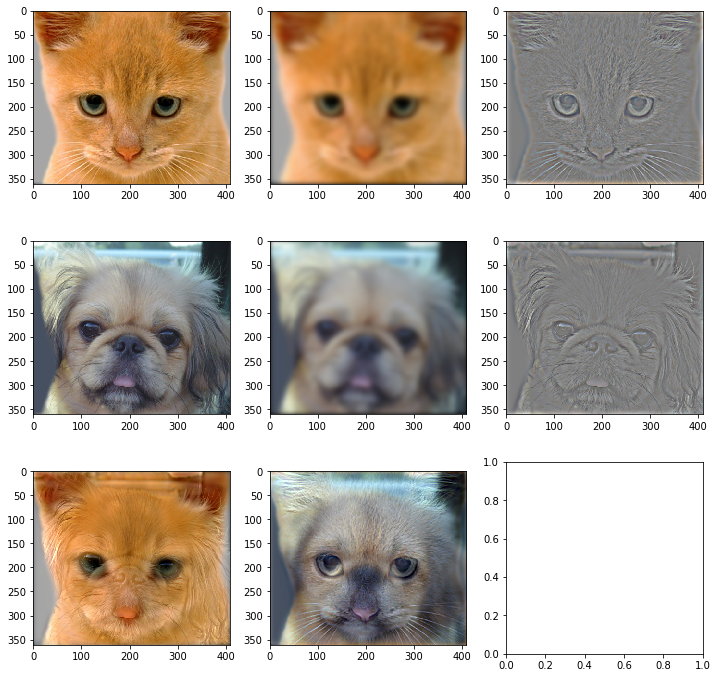

In [71]:
f, axarr = plt.subplots(3,3,figsize=(12,12))
axarr[0,0].imshow(im)
axarr[0,1].imshow(imb)
axarr[0,2].imshow(ims+0.5)
axarr[1,0].imshow(do)
axarr[1,1].imshow(dob)
axarr[1,2].imshow(dos+0.5)
axarr[2,0].imshow(imb+dos)
axarr[2,1].imshow(ims+dob)

In [84]:
pics = sorted(os.listdir(path='pics'))
np.asarray(pics)
len(pics)

10

In [116]:
sigma = 3.5
imgs = []
for i in range(len(pics)):
    if (i % 2 == 0): 
        shrp = sharpen_image(np.asarray(Image.open("pics/" + pics[i]), dtype=float)/255., sigma)
    else:
        blur = blur_image(np.asarray(Image.open("pics/" + pics[i]), dtype=float)/255., sigma)
        imgs.append(blur + shrp)
        
for i in range(len(pics)):
    if (i % 2 == 0): 
        blur = blur_image(np.asarray(Image.open("pics/" + pics[i]), dtype=float)/255., sigma)
    else:
        shrp = sharpen_image(np.asarray(Image.open("pics/" + pics[i]), dtype=float)/255., sigma)
        imgs.append(blur + shrp)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


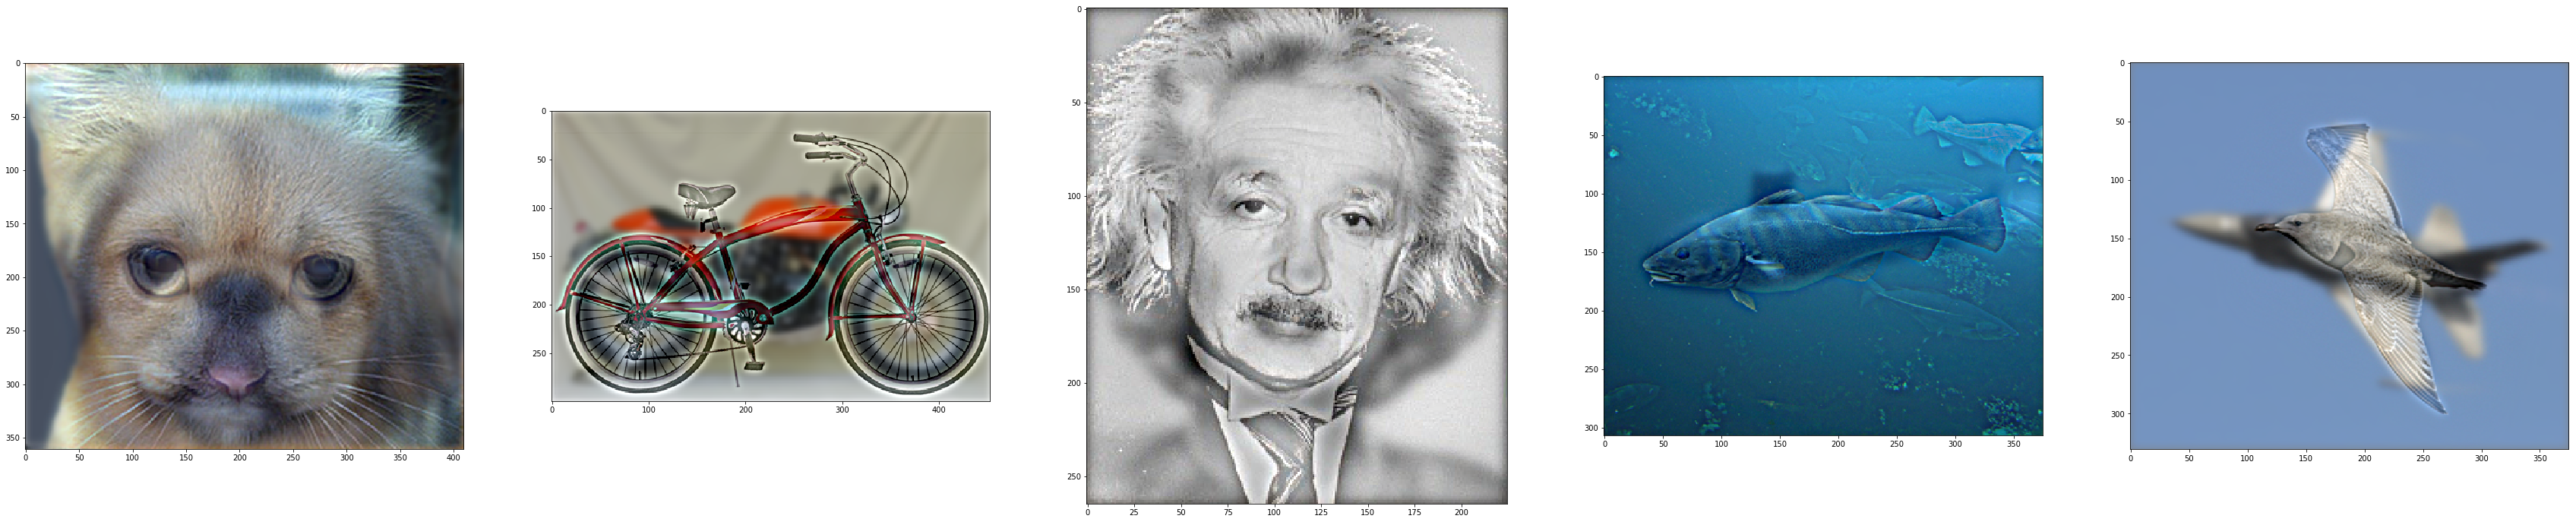

In [117]:
f, axarr = plt.subplots(1,int(len(imgs)/2),figsize=(60,12))
for i in range(int(len(imgs)/2)):
    axarr[i].imshow(imgs[i])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


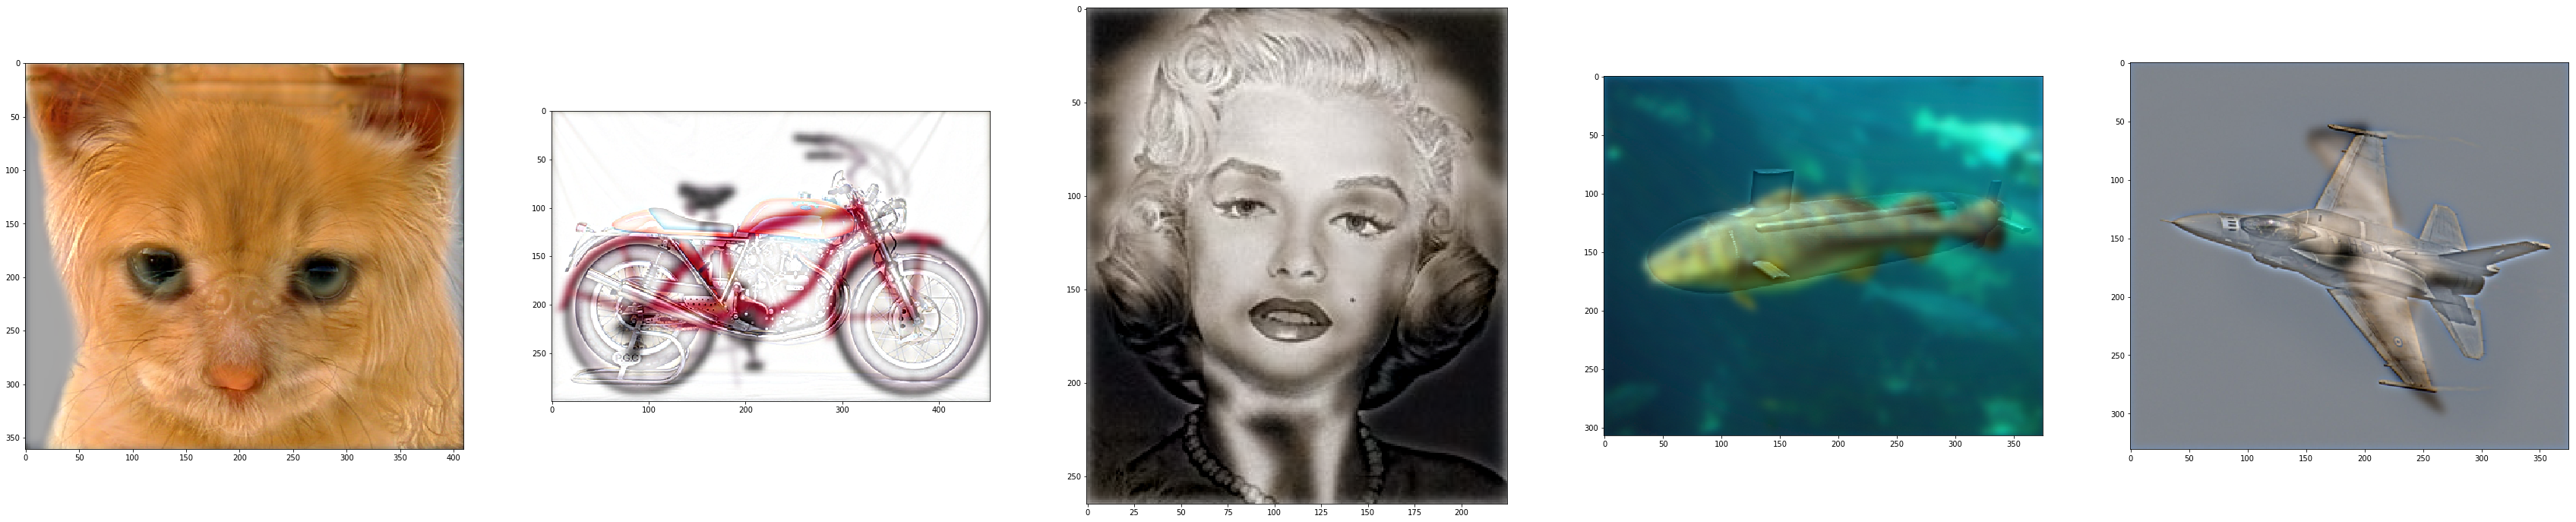

In [118]:
f, axarr = plt.subplots(1,int(len(imgs)/2),figsize=(60,12))
for i in range(int(len(imgs)/2)):
    axarr[i].imshow(imgs[i+int(len(imgs)/2)])